# Biologia de sistemas SIMULACIONES

In [ ]:
## NO CORRER TODO
# TARDA MUCHO


## Sucio (no vale)

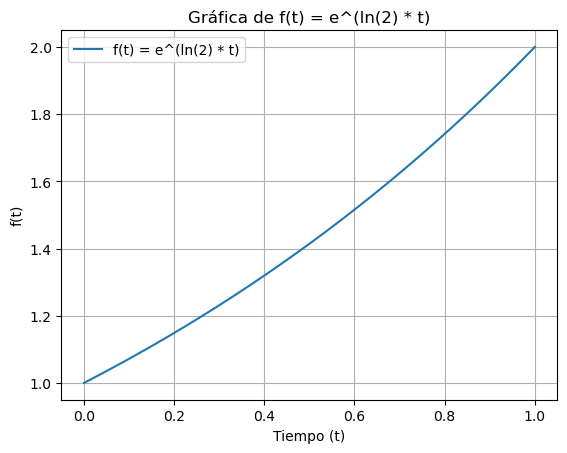

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de tiempo t
t = np.linspace(0, 1, 100)  # desde 0 hasta 5, con 100 puntos

# Función f(t) = e^(ln(2) * t)
f_t = np.exp(np.log(2) * t)

# También podrías usar directamente: f_t = 2**t

# Graficar
plt.plot(t, f_t, label='f(t) = e^(ln(2) * t)')
plt.xlabel('Tiempo (t)')
plt.ylabel('f(t)')
plt.title('Gráfica de f(t) = e^(ln(2) * t)')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import numpy as np

In [7]:
m = 60       # Plasmid copy number
α = 11       # Transcriptional activation
σ1 = 2.0     # OR2 binding affinity
σ2 = 0.08    # OR3 binding affinity
β = 100.0    # Basal cI production
η = 0.01     # GFP production efficiency
γ_g = 10.0   # GFP degradation rate
b0 = 4.0     # Fluorescence offset
c1 = 0.05    # Dimerization constant
c2 = 0.33    # cI-OR1 binding constant
c = c1*c2
γ_x_range = np.linspace(500, 15000, 20)  # Destabilization rates
# Escogemos por ejemplo un valor bajo
γ_x = 500

In [3]:
# Initial conditions
x0 = 100.0   # Initial cI monomers
g0 = 100.0   # Initial GFP molecules
v0 = 1.0     # Initial cell volume (dimensionless)

In [5]:
from scipy.integrate import odeint

def ode_system(state, t, γ_x, c1, c, m, γ_g, η, β, α, σ1, σ2):
    x, g = state  # Unpack state variables
    v = v0 * np.exp(np.log(2) * t)  # Volume grows exponentially
    
    # Calculate f(x, v) and h(x, v)
    denominator = 1 + (c*x**2)/v**2 + σ1*(c**2 * x**4)/v**4 + σ1*σ2*(c**3 * x**6)/v**6
    numerator_f = m * (1 + (c*x**2)/v**2 + α*σ1*(c**2 * x**4)/v**4)
    #f = numerator_f / denominator
    
    d0 = m / denominator
    f = d0 * numerator_f
    h = 1 + (4*c1*x)/v + (4*c*x*d0)/v**2 + (16*σ1*c**2 * x**3 * d0)/v**4 + (36*σ1*σ2*c**3 * x**5 * d0)/v**6
    
    # Derivatives
    dxdt = (β * f - γ_x * x) / h
    dgdt = η * β * f - γ_g * g
    
    return [dxdt, dgdt]

In [ ]:
## Ignorar

def f(x, v):
    numerator = m * (1 + (c*x**2)/v**2 + α*σ1*(c**2 * x**4)/v**4)
    denominator = 1 + (c*x**2)/v**2 + σ1*(c**2 * x**4)/v**4 + σ1*σ2*(c**3 * x**6)/v**6
    return numerator / denominator

def h(x, v):
    d0 = m / denominator  # Same denominator as f(x, v)
    term1 = 4 * c1 * x / v
    term2 = 4 * c * x * d0 / v**2
    term3 = 16 * σ1 * (c**2 * x**3 * d0) / v**4
    term4 = 36 * σ1 * σ2 * (c**3 * x**5 * d0) / v**6
    return 1 + term1 + term2 + term3 + term4

In [ ]:
## Ignorar
dxdt = (β * f(x, v) - γ_x * x) / h(x, v)
dgdt = η * β * f(x, v) - γ_g * g

NameError: name 'x' is not defined

In [ ]:
import numpy as np

# Time points (0 to 1 cell division cycle)
t = np.linspace(0, 1, 1000)  

# Choose a destabilization rate (e.g., γ_x = 3000)
γ_x = 3000  

# Solve ODE
solution = odeint(ode_system, [x0, g0, ], t, args=(γ_x,))
x_sol, g_sol = solution[:, 0], solution[:, 1]

In [ ]:
## Dani

# Añado los parámetros que faltan
# Corro esta que se supone que está reparada

# Time points (0 to 1 cell division cycle)
t = np.linspace(0, 1, 1000)  

# Choose a destabilization rate (e.g., γ_x = 3000)
γ_x = 3000  

# Solve ODE
solution = odeint(ode_system, [x0, g0], t, args=(γ_x, c1, c, m, γ_g, η, β, α, σ1, σ2,))
x_sol, g_sol = solution[:, 0], solution[:, 1]

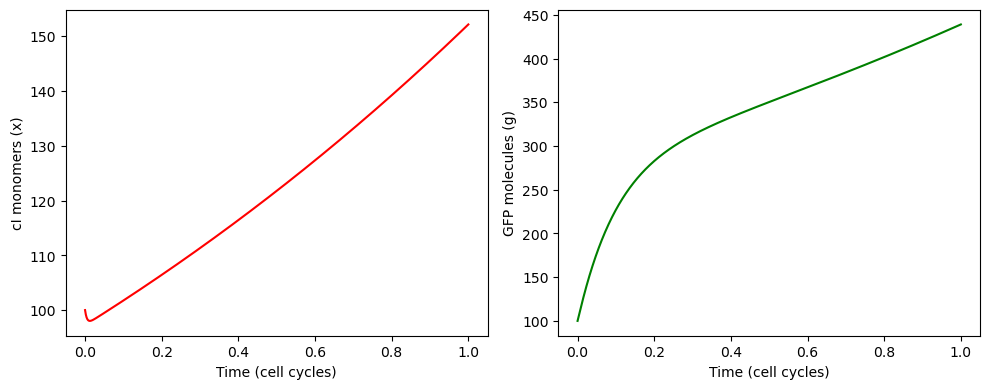

In [ ]:
import matplotlib.pyplot as plt

## Dani lo ha corrido con cosas arregladas

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x_sol, 'r')
plt.xlabel('Time (cell cycles)')
plt.ylabel('cI monomers (x)')

plt.subplot(1, 2, 2)
plt.plot(t, g_sol, 'g')
plt.xlabel('Time (cell cycles)')
plt.ylabel('GFP molecules (g)')
plt.tight_layout()
plt.show()

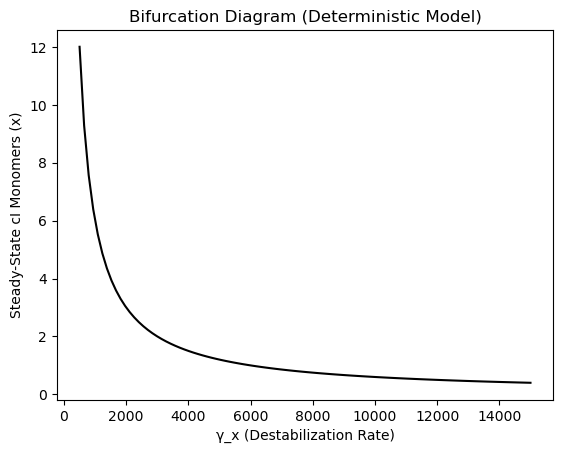

In [29]:
import numpy as np
from scipy.integrate import odeint

# Define γ_x range (500 to 15,000)
gamma_x_values = np.linspace(500, 15000, 100)
steady_states = []

for gamma_x in gamma_x_values:
    # Solve ODE for a long time to reach steady state
    t = np.linspace(0, 10, 1000)  # Simulate 10 cell cycles
    solution = odeint(ode_system, [x0, g0], t, args=(gamma_x,))
    x_steady = solution[-1, 0]  # Take final value
    steady_states.append(x_steady)

# Plot bifurcation diagram
plt.plot(gamma_x_values, steady_states, 'k-')
plt.xlabel('γ_x (Destabilization Rate)')
plt.ylabel('Steady-State cI Monomers (x)')
plt.title('Bifurcation Diagram (Deterministic Model)')
plt.show()

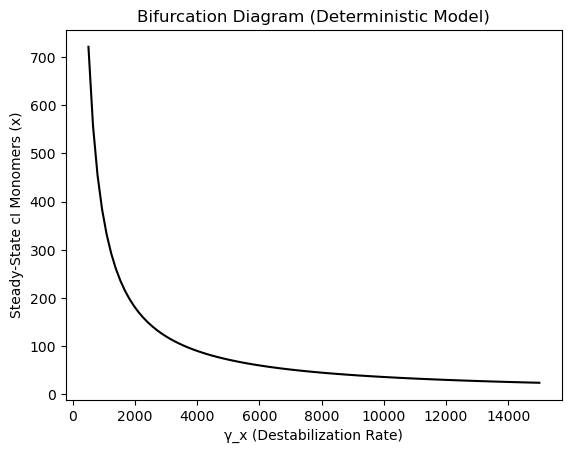

In [ ]:
## Dani
# Lo repito añadiendo más argumentos y tras arreglar las funciones

# Intuyo que se está intentando conseguir alguna de las figuras 4. 
# Para ello, creo que habría que plantearse que la función que queremos representar 
# es por un lado la fluorescencia (dentro del odeint) [esto es lo nuevo que habría que crear]
# y por otra parte el gamma_x (γ_x) 

# Además para que salgan las dos líneas, supongo que realmente hay que superponer 2 gráficas: 
# una generada aumentando los valores de γ_x y otra por disminuir esos valores


# Define γ_x range (500 to 15,000)
gamma_x_values = np.linspace(500, 15000, 100)
steady_states = []

for gamma_x in gamma_x_values:
    # Solve ODE for a long time to reach steady state
    t = np.linspace(0, 10, 1000)  # Simulate 10 cell cycles
    solution = odeint(ode_system, [x0, g0], t, args=(gamma_x, c1, c, m, γ_g, η, β, α, σ1, σ2,))
    x_steady = solution[-1, 0]  # Take final value
    steady_states.append(x_steady)

# Plot bifurcation diagram
plt.plot(gamma_x_values, steady_states, 'k-')
plt.xlabel('γ_x (Destabilization Rate)')
plt.ylabel('Steady-State cI Monomers (x)')
plt.title('Bifurcation Diagram (Deterministic Model)')
plt.show()

C:\Users\Daniel Parra\AppData\Local\Temp\ipykernel_29660\1452695320.py:33: RuntimeWarning: invalid value encountered in sqrt
  g += dgdt * dt + np.sqrt(η * β * f + γ_g * g) * np.sqrt(dt) * np.random.normal()
C:\Users\Daniel Parra\AppData\Local\Temp\ipykernel_29660\1452695320.py:32: RuntimeWarning: invalid value encountered in sqrt
  x += dxdt * dt + np.sqrt((β * f + gamma_x * x) / h) * np.sqrt(dt) * np.random.normal()
c:\Users\Daniel Parra\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\Daniel Parra\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

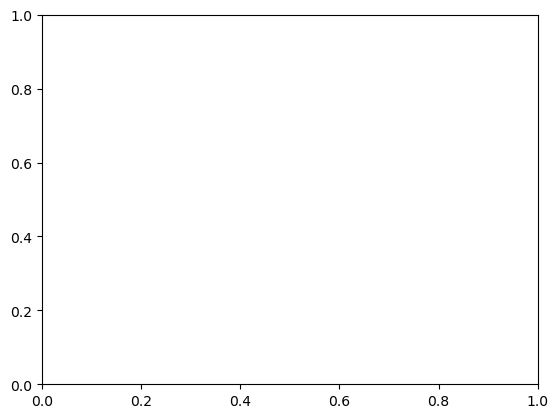

In [16]:
## (Dani) NO CORRER
## TARDA MUCHO ()


def stochastic_simulation(gamma_x, c1, c, m, γ_g, η, β, α, σ1, σ2, x0, g0, v0, num_cells=50000):
    # Initialize arrays
    x_final = np.zeros(num_cells)
    g_final = np.zeros(num_cells)
    
    for i in range(num_cells):
        # Simulate single cell with noise (Euler-Maruyama)
        x = x0
        g = g0
        v = v0
        dt = 0.01  # Time step
        
        for _ in range(1000):  # Simulate 10 cell cycles
            # Update volume
            v = v0 * np.exp(np.log(2) * (_ * dt))
            
            # Compute f(x, v) and h(x, v) as f and d
            denominator = 1 + (c*x**2)/v**2 + σ1*(c**2 * x**4)/v**4 + σ1*σ2*(c**3 * x**6)/v**6
            numerator_f = (1 + (c*x**2)/v**2 + α*σ1*(c**2 * x**4)/v**4)
            d0 = m / denominator
            f = numerator_f * d0
            h = 1 + (4*c1*x)/v + (4*c*x*d0)/v**2 + (16*σ1*c**2 * x**3 * d0)/v**4 + (36*σ1*σ2*c**3 * x**5 * d0)/v**6

            # Compute dxdt and dgdt
            dxdt = (β * f - gamma_x * x) / h
            dgdt = η * β * f - γ_g * g
            
            # Add noise (Euler-Maruyama)
            x += dxdt * dt + np.sqrt((β * f + gamma_x * x) / h) * np.sqrt(dt) * np.random.normal()
            g += dgdt * dt + np.sqrt(η * β * f + γ_g * g) * np.sqrt(dt) * np.random.normal()
            ## No entiendo por qué aquí se multiplica por la dt y su sqrt (propondría probar a hacerlo sin esa parte)


            # Cell division (halve molecules every cell cycle)
            if (_ * dt) % 1 == 0:
                x = x / 2
                g = g / 2
                v = v / 2
        
        x_final[i] = x
        g_final[i] = g
    
    # Convert GFP to fluorescence
    c_gamma = 4.0  # Example for γ_x=3750 (adjust per Fig. 7)
    F = c_gamma * (g_final + b0)
    
    # Plot histogram
    plt.hist(F, bins=50, color='green', alpha=0.7)
    plt.xlabel('Fluorescence (A.U.)')
    plt.ylabel('Frequency')
    plt.title(f'γ_x = {gamma_x}')
    plt.show()

# Run for bistable regime (γ_x=3750) gamma_x, c1, c, m, γ_g, η, β, α, σ1, σ2, x0, g0, v0, num_cells=50000
stochastic_simulation(3750, c1, c, m, γ_g, η, β, α, σ1, σ2, x0, g0, v0, )

---

In [ ]:
### ChatGTP modelo determinista

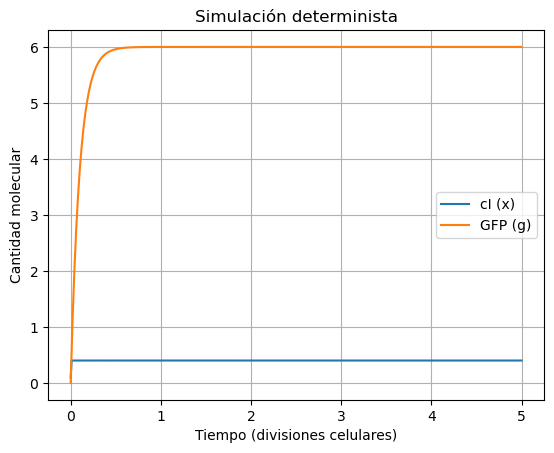

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Opinión de Dani:
# Entiendo que en estas funciones se supone que el volumen tiene un valor fijo 
# y que es el tiempo el que cambia.
# Realmente, según indicó el profe, es el tiempo el que debería de ser adimensional,
# pero eso era de cara a calcular el volumen; y como también nos dijo que podíamos 
# probar a hacer la suposición de que el volumen tenga un valor fijo, puede ser interesante.
# La gráfica resultante puede ser una para poner en la presentación
# (Si no sale nada raro)

# Parámetros
alpha = 11
c1 = 0.05
c2 = 0.33
sigma1 = 2.0
sigma2 = 0.08
beta = 100
eta = 0.01
gamma_g = 10
m = 60
gamma_x = 15000  # Puedes barrer esto entre 500 y 15000
v = 1  # volumen típico durante el crecimiento celular


b0 = 4.0     # Fluorescence offset (aquí no es necesario)
c = c1*c2

# Funciones auxiliares
def d0(x):
    num = m
    den = 1 + c * x**2 / v**2 + sigma1 * c**2 * x**4 / v**4 + sigma1 * sigma2 * c**3 * x**6 / v**6
    return num / den

#def f(x):
#    num = m * (1 + c2 * x**2 / v**2 + alpha * sigma1 * c2**2 * x**4 / v**4)
#    den = 1 + c2 * x**2 / v**2 + sigma1 * c2**2 * x**4 / v**4 + sigma1 * sigma2 * c2**3 * x**6 / v**6
#    return num / den

def f(x):
    d = d0(x)
    num_f = (1 + c * x**2 / v**2 + alpha * sigma1 * c**2 * x**4 / v**4)
    return num_f * d

def h(x):
    d = d0(x)
    return 1 + 4*c1*x/v + 4*c*x*d/v**2 + 16*sigma1*c**2*x**3*d/v**4 + 36*sigma1*sigma2*c**3*x**5*d/v**6

# Ecuaciones diferenciales
def model(t, y):
    x, g = y
    dxdt = (beta * f(x) - gamma_x * x) / h(x)
    dgdt = eta * beta * f(x) - gamma_g * g
    return [dxdt, dgdt]

# Condiciones iniciales y simulación
y0 = [0.1, 0.1]
t_span = (0, 5) # He cambiado esta variable para que se vea mejor (antes era 50)
sol = solve_ivp(model, t_span, y0, t_eval=np.linspace(*t_span, 500))

# Gráfica
plt.plot(sol.t, sol.y[0], label='cI (x)')
plt.plot(sol.t, sol.y[1], label='GFP (g)')
plt.xlabel("Tiempo (divisiones celulares)")
plt.ylabel("Cantidad molecular")
plt.legend()
plt.title("Simulación determinista")
plt.grid()
plt.show()


En este gráfico podemos observar que se alcanza el máximo de GFP y de cI en un único ciclo celular, por lo que no es necesario que nos fijemos en más. 

Puede que no cambie porque el valor del volumen se mantiene constante

In [ ]:
## Modelo Estocástico (Langevin)

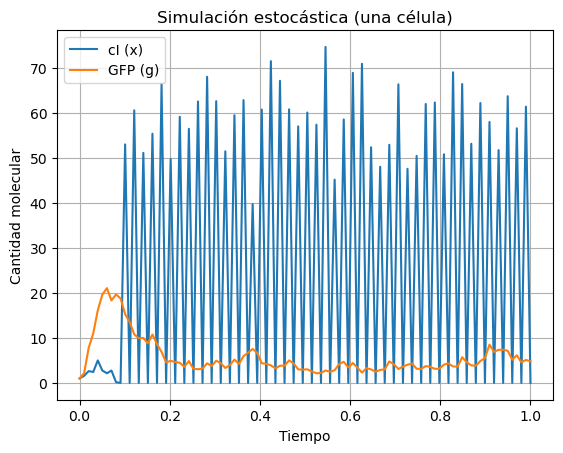

In [ ]:
## Dani no ha pasado de este punto

np.random.seed(42)

dt = 0.01
T = 1
N = int(T / dt)
x = np.zeros(N)
g = np.zeros(N)
x[0] = 1.0
g[0] = 1.0

for i in range(1, N):
    fx = f(x[i-1])
    hx = h(x[i-1])
    
    dx_mean = (beta * fx - gamma_x * x[i-1]) / hx
    dx_noise = np.sqrt((beta * fx + gamma_x * x[i-1]) / hx) * np.random.normal(0, np.sqrt(dt))
    
    dg_mean = eta * beta * fx - gamma_g * g[i-1]
    dg_noise = np.sqrt(eta * beta * fx + gamma_g * g[i-1]) * np.random.normal(0, np.sqrt(dt))

    x[i] = x[i-1] + dx_mean * dt + dx_noise
    g[i] = g[i-1] + dg_mean * dt + dg_noise
    x[i] = max(x[i], 0)
    g[i] = max(g[i], 0)

time = np.linspace(0, T, N)
plt.plot(time, x, label='cI (x)')
plt.plot(time, g, label='GFP (g)')
plt.xlabel("Tiempo")
plt.ylabel("Cantidad molecular")
plt.title("Simulación estocástica (una célula)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Histograma de GFP vs Temperatura (Simulación Estocástica)

In [ ]:
### recreacioni Fig. 2A (Histograma de GFP por temperatura)

Simulando...


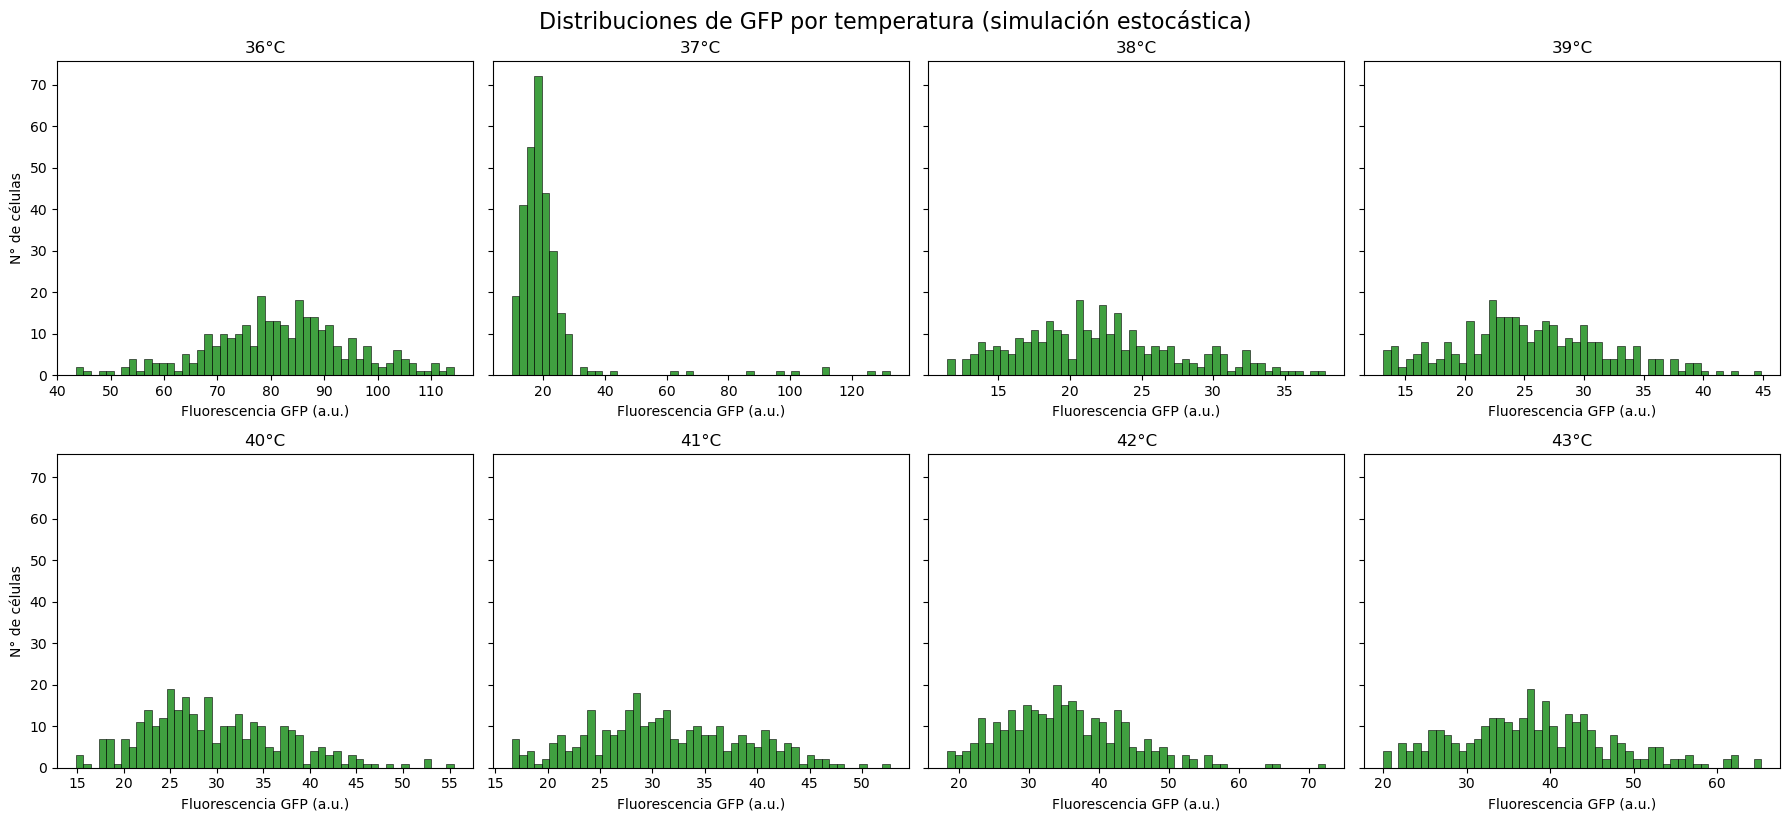

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros biológicos
alpha = 11
c1 = 0.05
c2 = 0.33
sigma1 = 2.0
sigma2 = 0.08
beta = 100
eta = 0.01
gamma_g = 10
m = 60
v = 1.5
b0 = 4  # offset de fluorescencia

# Funciones auxiliares
def d0(x):
    return m / (1 + c2*x**2/v**2 + sigma1*c2**2*x**4/v**4 + sigma1*sigma2*c2**3*x**6/v**6)

def f(x):
    num = m * (1 + c2*x**2/v**2 + alpha*sigma1*c2**2*x**4/v**4)
    den = 1 + c2*x**2/v**2 + sigma1*c2**2*x**4/v**4 + sigma1*sigma2*c2**3*x**6/v**6
    return num / den

def h(x):
    return 1 + 4*c1*x/v + 4*c2*x*d0(x)/v**2 + \
           16*sigma1*c2**2*x**3*d0(x)/v**4 + 36*sigma1*sigma2*c2**3*x**5*d0(x)/v**6

# Simulación estocástica de una célula
def simulate_cell(gamma_x, T=50, dt=0.01):
    N = int(T / dt)
    x = np.zeros(N)
    g = np.zeros(N)
    x[0] = 1.0
    g[0] = 1.0
    for i in range(1, N):
        fx = f(x[i-1])
        hx = h(x[i-1])
        dxdt = (beta * fx - gamma_x * x[i-1]) / hx
        noise_x = np.sqrt((beta * fx + gamma_x * x[i-1]) / hx) * np.random.normal(0, np.sqrt(dt))
        dgdt = eta * beta * fx - gamma_g * g[i-1]
        noise_g = np.sqrt(eta * beta * fx + gamma_g * g[i-1]) * np.random.normal(0, np.sqrt(dt))
        x[i] = max(x[i-1] + dxdt * dt + noise_x, 0)
        g[i] = max(g[i-1] + dgdt * dt + noise_g, 0)
    return g[-1]  # último valor de GFP

# Mapeo de temperatura a gamma_x
def gamma_from_temp(T):
    return 500 * np.exp(0.55 * (T - 32))  # basado en paper

# Simular muchas células y graficar histogramas
temps = [36, 37, 38, 39, 40, 41, 42, 43]
cells_per_temp = 300
fluorescence_data = {}

print("Simulando...")

for T in temps:
    gamma_x = gamma_from_temp(T)
    gfp_values = [simulate_cell(gamma_x) for _ in range(cells_per_temp)]
    # Ajuste de fluorescencia según paper: F = c(γx)(g + b0)
    c_gamma = 2 + 3 * ((T - 36) / (43 - 36))  # rango de 2–5.7 aproximadamente
    fluorescence = [c_gamma * (g + b0) for g in gfp_values]
    fluorescence_data[T] = fluorescence

# Gráficos tipo histograma (stacked)
fig, axes = plt.subplots(2, 4, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for idx, T in enumerate(temps):
    sns.histplot(fluorescence_data[T], bins=50, kde=False, ax=axes[idx], color='green')
    axes[idx].set_title(f"{T}°C")
    axes[idx].set_xlabel("Fluorescencia GFP (a.u.)")
    axes[idx].set_ylabel("N° de células")

plt.tight_layout()
plt.suptitle("Distribuciones de GFP por temperatura (simulación estocástica)", fontsize=16, y=1.02)
plt.show()

In [ ]:
## Fig. 2B–C (Simulación de GFP y cI con diferentes 𝛾𝑥)

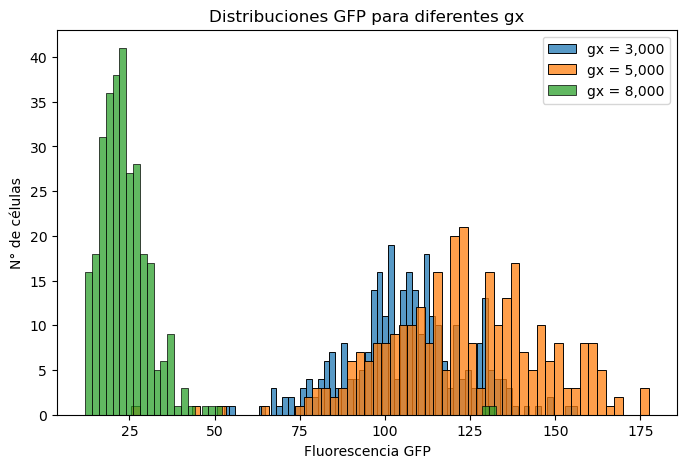

In [49]:
import matplotlib.pyplot as plt

# Gráficos de varias simulaciones para una gamma_x fija
def simulate_distributions(gamma_x, label):
    gfp_values = [simulate_cell(gamma_x) for _ in range(300)]
    c_gamma = 3.0
    fluorescence = [c_gamma * (g + b0) for g in gfp_values]
    sns.histplot(fluorescence, bins=60, label=label, kde=False)

plt.figure(figsize=(8,5))
simulate_distributions(3000, "gx = 3,000")
simulate_distributions(5000, "gx = 5,000")
simulate_distributions(8000, "gx = 8,000")
plt.legend()
plt.title("Distribuciones GFP para diferentes gx")
plt.xlabel("Fluorescencia GFP")
plt.ylabel("N° de células")
plt.show()

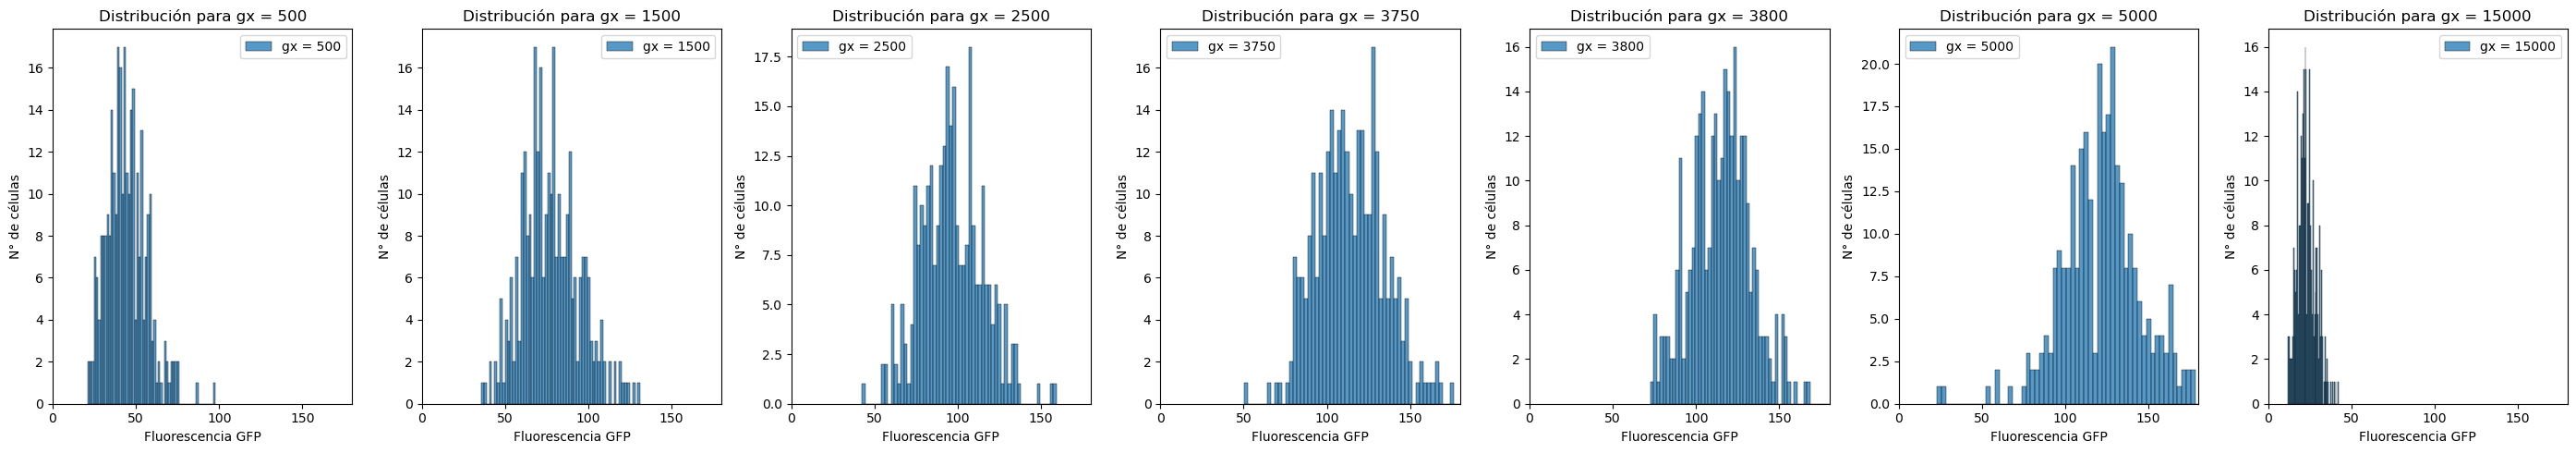

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que las funciones simulate_cell y b0 estén definidas
def simulate_distributions(gamma_x, label, ax):
    gfp_values = [simulate_cell(gamma_x) for _ in range(300)]
    c_gamma = 3.0
    fluorescence = [c_gamma * (g + b0) for g in gfp_values]
    sns.histplot(fluorescence, bins=60, label=label, kde=False, ax=ax)

# Lista de parámetros
parametros = [
    (500, "gx = 500"),
    (1500, "gx = 1500"),
    (2500, "gx = 2500"),
    (3750, "gx = 3750"),
    (3800, "gx = 3800"),
    (5000, "gx = 5000"),
    (15000, "gx = 15000")
]

# Crear figura con 1 fila y 7 columnas
fig, axes = plt.subplots(1, 7, figsize=(28, 5))  # 28 (ancho total) = 4 * 7 gráficos

# Generar cada gráfico en su eje correspondiente
for (gamma_x, label), ax in zip(parametros, axes):
    simulate_distributions(gamma_x, label, ax)
    ax.set_title(f"Distribución para {label}")
    ax.set_xlabel("Fluorescencia GFP")
    ax.set_ylabel("N° de células")
    ax.set_xlim(0, 180)
    ax.legend()

plt.tight_layout() 
plt.show()

In [ ]:
# Fig. 3A (Dinámica temporal de una célula en estado intermedio)

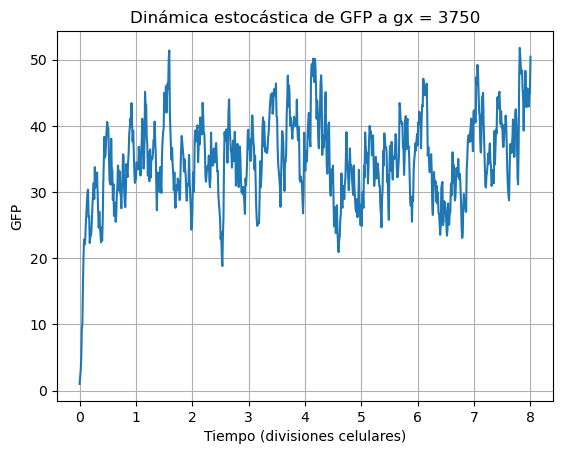

In [63]:
def simulate_trace(gamma_x, T=8, dt=0.01):
    N = int(T / dt)
    x = np.zeros(N)
    g = np.zeros(N)
    x[0] = 1.0
    g[0] = 1.0
    for i in range(1, N):
        fx = f(x[i-1])
        hx = h(x[i-1])
        dxdt = (beta * fx - gamma_x * x[i-1]) / hx
        noise_x = np.sqrt((beta * fx + gamma_x * x[i-1]) / hx) * np.random.normal(0, np.sqrt(dt))
        dgdt = eta * beta * fx - gamma_g * g[i-1]
        noise_g = np.sqrt(eta * beta * fx + gamma_g * g[i-1]) * np.random.normal(0, np.sqrt(dt))
        x[i] = max(x[i-1] + dxdt * dt + noise_x, 0)
        g[i] = max(g[i-1] + dgdt * dt + noise_g, 0)
    return x, g

x, g = simulate_trace(gamma_x=3750)
time = np.linspace(0, 8, len(x))
plt.plot(time, g)
plt.xlabel("Tiempo (divisiones celulares)")
plt.ylabel("Fluorescence (a.u)")
plt.title("Fig. 3B Dinámica estocástica de GFP a gx = 3750")
plt.grid()
plt.show()


In [ ]:
##Fig. 4A (Valor medio de GFP vs temperatura)

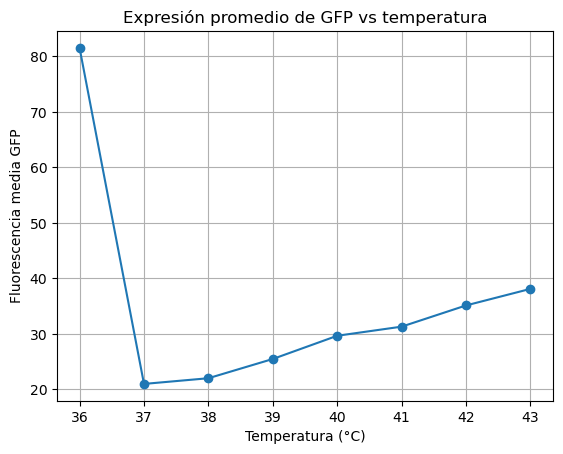

In [53]:
means = [np.mean(fluorescence_data[T]) for T in temps]
plt.plot(temps, means, marker='o')
plt.xlabel("Temperatura (°C)")
plt.ylabel("Fluorescencia media GFP")
plt.title("Expresión promedio de GFP vs temperatura")
plt.grid()
plt.show()

In [ ]:
# Fig. 4B (Coeficiente de variación vs temperatura)

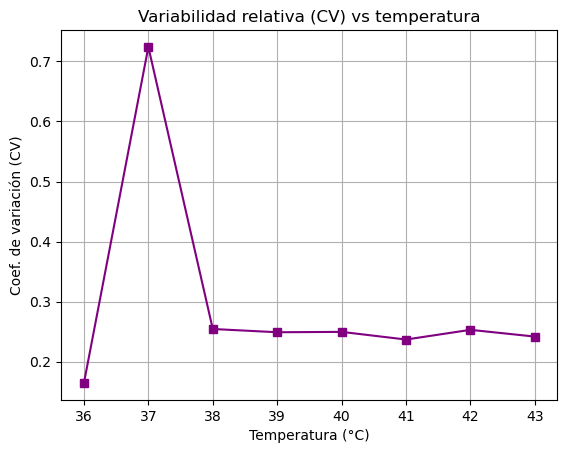

In [55]:
cvs = [np.std(fluorescence_data[T]) / np.mean(fluorescence_data[T]) for T in temps]
plt.plot(temps, cvs, marker='s', color='purple')
plt.xlabel("Temperatura (°C)")
plt.ylabel("Coef. de variación (CV)")
plt.title("Variabilidad relativa (CV) vs temperatura")
plt.grid()
plt.show()


##### Parámetros que podemos modificar para experimentar

| **Parámetro**   | **Efecto / Observación interesante**                          |
|-----------------|---------------------------------------------------------------|
| **alpha**       | Mayor α → más bistabilidad, más pronunciada                   |
| **eta**         | Más o menos GFP por cI (afecta visibilidad)                   |
| **gamma_x**     | Aumentalo para simular temperatura → cambia estados           |
| **c1, c2**      | Afinidad de dimerización/binding → afina forma de curvas      |
| **b0, c(gx)**   | Cambia conversión a fluorescencia, afecta histograma          |
| **cells_per_temp** | Mejora estadística (mayor n° de células)                   |
| **T (tiempo)**  | Tiempo simulado por célula. Aumentalo para ver switching      |


In [ ]:
### Aproximacion determinista

Simulando...


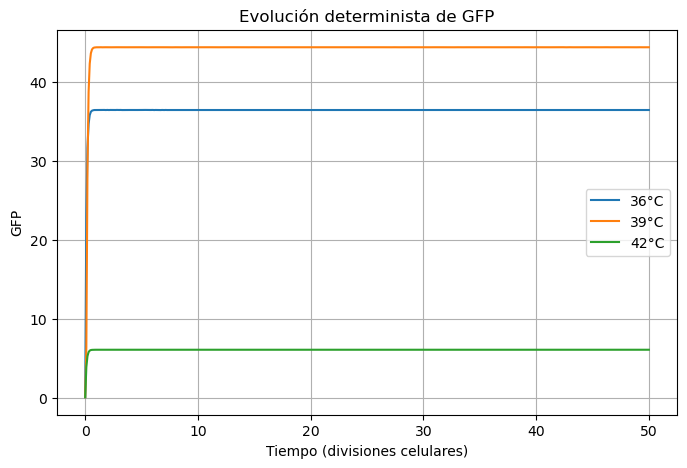

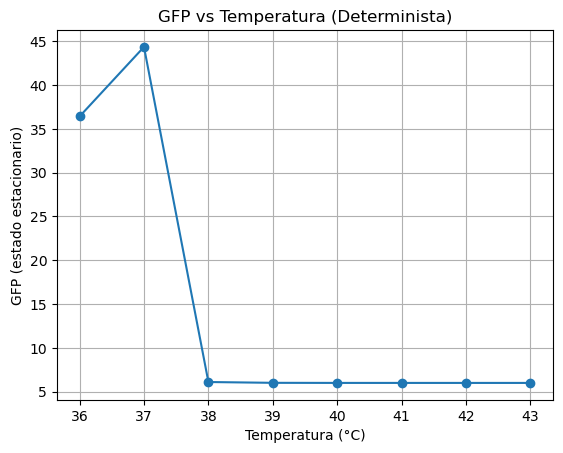

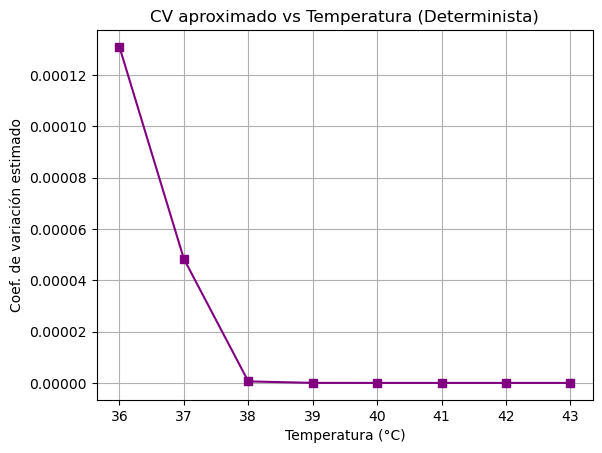

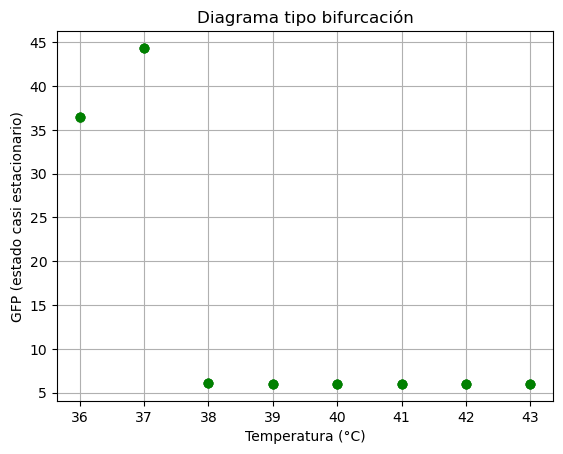

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ----------------- PARÁMETROS -------------------
alpha = 11
c1 = 0.05
c2 = 0.33
sigma1 = 2.0
sigma2 = 0.08
beta = 100
eta = 0.01
gamma_g = 10
m = 60
v = 1.5
b0 = 4

# Mapeo temperatura → gamma_x
def gamma_from_temp(T):
    return 500 * np.exp(0.55 * (T - 32))  # extraído del artículo

# Funciones auxiliares (ODEs)
def d0(x):
    return m / (1 + c2*x**2/v**2 + sigma1*c2**2*x**4/v**4 + sigma1*sigma2*c2**3*x**6/v**6)

def f(x):
    num = m * (1 + c2*x**2/v**2 + alpha*sigma1*c2**2*x**4/v**4)
    den = 1 + c2*x**2/v**2 + sigma1*c2**2*x**4/v**4 + sigma1*sigma2*c2**3*x**6/v**6
    return num / den

def h(x):
    return 1 + 4*c1*x/v + 4*c2*x*d0(x)/v**2 + 16*sigma1*c2**2*x**3*d0(x)/v**4 + 36*sigma1*sigma2*c2**3*x**5*d0(x)/v**6

# Ecuaciones diferenciales
def model(t, y, gamma_x):
    x, g = y
    dxdt = (beta * f(x) - gamma_x * x) / h(x)
    dgdt = eta * beta * f(x) - gamma_g * g
    return [dxdt, dgdt]

# ------------- BARRIDO DE TEMPERATURAS ------------
temps = np.arange(36, 44)  # 36 a 43
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

gfp_steady = []
cv_estimate = []
all_gfp_curves = []

print("Simulando...")

for T in temps:
    gamma_x = gamma_from_temp(T)
    sol = solve_ivp(model, t_span, y0=[0.1, 0.1], args=(gamma_x,), t_eval=t_eval)
    x, g = sol.y
    gfp_steady.append(g[-1])
    all_gfp_curves.append(g)

    # Simulación de CV aproximado: variación temporal respecto a media
    cv = np.std(g[-100:]) / np.mean(g[-100:])
    cv_estimate.append(cv)

# -------------- FIGURAS ------------------

# 1. Evolución temporal de GFP a tres temperaturas
plt.figure(figsize=(8,5))
for idx, T in enumerate([36, 39, 42]):
    plt.plot(t_eval, all_gfp_curves[idx], label=f'{T}°C')
plt.xlabel("Tiempo (divisiones celulares)")
plt.ylabel("GFP")
plt.title("Evolución determinista de GFP")
plt.legend()
plt.grid()
plt.show()

# 2. GFP en estado estacionario vs temperatura (Fig. 4A)
plt.figure()
plt.plot(temps, gfp_steady, marker='o')
plt.xlabel("Temperatura (°C)")
plt.ylabel("GFP (estado estacionario)")
plt.title("GFP vs Temperatura (Determinista)")
plt.grid()
plt.show()

# 3. CV estimado vs temperatura (solo aproximación)
plt.figure()
plt.plot(temps, cv_estimate, marker='s', color='purple')
plt.xlabel("Temperatura (°C)")
plt.ylabel("Coef. de variación estimado")
plt.title("CV aproximado vs Temperatura (Determinista)")
plt.grid()
plt.show()

# 4. Diagrama tipo bifurcación
plt.figure()
for idx, g in enumerate(all_gfp_curves):
    plt.plot([temps[idx]] * len(g[-20:]), g[-20:], 'go', alpha=0.2)
plt.xlabel("Temperatura (°C)")
plt.ylabel("GFP (estado casi estacionario)")
plt.title("Diagrama tipo bifurcación")
plt.grid()
plt.show()


## Parámetros que se pueden modificar para ver el efecto

| Parámetro | Efecto observable |
|-----------|-------------------|
| **alpha** | ↑ Bistabilidad → más regiones con doble estado |
| **gamma_x** | Cambio en la posición del "salto" en GFP |
| **eta** | Relación entre cI y GFP → escala de fluorescencia |
| **t_span** | Tiempo total de simulación → puede detectar más lento switching |
| **v** | Cambio de volumen afecta dinámica de reacciones |


## Características: Estocástico vs Determinista

| Característica | Estocástico | Determinista |
|----------------|-------------|--------------|
| **Transiciones entre estados** | Ocurren de forma aleatoria | No ocurren sin cambio de parámetro |
| **Histograma** | Dos picos posibles (bimodalidad real) | Siempre un valor por temperatura |
| **Histeresis** | Ausente por ruido | Presente si simulas barrido inverso |
| **Variabilidad** | Naturalmente emergente | Requiere cálculo artificial |


In [ ]:
## comparacion de histeresis en modelo detemrinista/estocástico

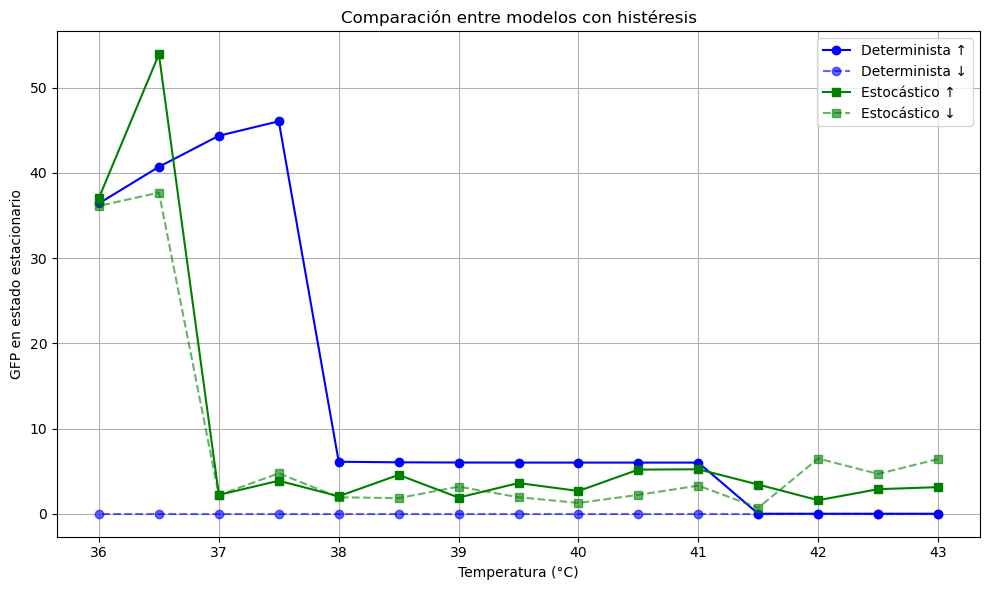

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --------- Parámetros del sistema (idénticos para ambos modelos) -----------
alpha = 11
c1 = 0.05
c2 = 0.33
sigma1 = 2.0
sigma2 = 0.08
beta = 100
eta = 0.01
gamma_g = 10
m = 60
v = 1.5
b0 = 4

# Mapeo temperatura → tasa de desestabilización
def gamma_from_temp(T):
    return 500 * np.exp(0.55 * (T - 32))

# Funciones auxiliares
def d0(x):
    return m / (1 + c2*x**2/v**2 + sigma1*c2**2*x**4/v**4 + sigma1*sigma2*c2**3*x**6/v**6)

def f(x):
    num = m * (1 + c2*x**2/v**2 + alpha*sigma1*c2**2*x**4/v**4)
    den = 1 + c2*x**2/v**2 + sigma1*c2**2*x**4/v**4 + sigma1*sigma2*c2**3*x**6/v**6
    return num / den

def h(x):
    return 1 + 4*c1*x/v + 4*c2*x*d0(x)/v**2 + 16*sigma1*c2**2*x**3*d0(x)/v**4 + 36*sigma1*sigma2*c2**3*x**5*d0(x)/v**6

# -------------------- Determinista -----------------------
def deterministic_sim(T_sequence, y0):
    gfp_steady = []
    for T in T_sequence:
        gamma_x = gamma_from_temp(T)
        sol = solve_ivp(lambda t, y: [(beta * f(y[0]) - gamma_x * y[0]) / h(y[0]),
                                      eta * beta * f(y[0]) - gamma_g * y[1]],
                        (0, 50), y0, t_eval=[50])
        y0 = sol.y[:, -1]
        gfp_steady.append(y0[1])
    return gfp_steady

# -------------------- Estocástico -----------------------
def stochastic_sim(T_sequence, y0, dt=0.01, T_max=50):
    def simulate_cell(gamma_x, x0, g0):
        N = int(T_max / dt)
        x, g = x0, g0
        for _ in range(N):
            fx = f(x)
            hx = h(x)
            dxdt = (beta * fx - gamma_x * x) / hx
            noise_x = np.sqrt((beta * fx + gamma_x * x) / hx) * np.random.normal(0, np.sqrt(dt))
            dgdt = eta * beta * fx - gamma_g * g
            noise_g = np.sqrt(eta * beta * fx + gamma_g * g) * np.random.normal(0, np.sqrt(dt))
            x = max(x + dxdt * dt + noise_x, 0)
            g = max(g + dgdt * dt + noise_g, 0)
        return x, g

    x, g = y0
    gfp_final = []
    for T in T_sequence:
        gamma_x = gamma_from_temp(T)
        x, g = simulate_cell(gamma_x, x, g)
        gfp_final.append(g)
    return gfp_final

# -------------------- Simulación -----------------------
temps_up = np.arange(36, 43.5, 0.5)
temps_down = temps_up[::-1]

# Condición inicial: estado alto (temperatura baja)
y0_deterministic = [5.0, 50.0]
y0_stochastic = [5.0, 50.0]

# Simulación determinista (ida y vuelta)
gfp_up_det = deterministic_sim(temps_up, y0_deterministic)
gfp_down_det = deterministic_sim(temps_down, y0_deterministic)

# Simulación estocástica (ida y vuelta)
gfp_up_stoch = stochastic_sim(temps_up, y0_stochastic)
gfp_down_stoch = stochastic_sim(temps_down, y0_stochastic)

# ------------------ Gráfico comparación ---------------------
plt.figure(figsize=(10,6))
plt.plot(temps_up, gfp_up_det, 'o-', label="Determinista ↑", color='blue')
plt.plot(temps_down, gfp_down_det, 'o--', label="Determinista ↓", color='blue', alpha=0.6)
plt.plot(temps_up, gfp_up_stoch, 's-', label="Estocástico ↑", color='green')
plt.plot(temps_down, gfp_down_stoch, 's--', label="Estocástico ↓", color='green', alpha=0.6)

plt.xlabel("Temperatura (°C)")
plt.ylabel("GFP en estado estacionario")
plt.title("Comparación entre modelos con histéresis")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## Parámetros y sus efectos

| Parámetro | Efecto |
|-----------|--------|
| **alpha o beta** | Cambia la forma del lazo de histéresis (más pronunciado si ↑) |
| **temps_up = np.arange(..., step)** | Mejora resolución del barrido |
| **dt y T_max en stochastic_sim** | Más resolución o duración del ruido |
| **x0, g0 en y0_stochastic** | Simula arranques en estados bajos o altos |


#### Interpretación gráfico:

El gráfico muestra la respuesta de GFP (en estado estacionario) al variar la temperatura, para ambos modelos:

- **Líneas azules** = modelo determinista
- **Líneas verdes** = modelo estocástico

- **Flecha ↑** = barrido de temperatura hacia arriba (36°C → 43°C)
- **Flecha ↓** = barrido hacia abajo (43°C → 36°C)

## Modelo determinista

**Línea azul sólida (↑)**:
Al subir la temperatura, el sistema permanece en un estado alto de GFP hasta que cae bruscamente (alrededor de 38–39°C). Esa caída indica un punto de bifurcación: el sistema ya no puede sostener la expresión alta y salta al estado bajo.

**Línea azul discontinua (↓)**:
Al bajar la temperatura desde 43°C, el sistema se queda en el estado bajo, incluso cuando ya habría suficiente "estabilidad" para volver al estado alto. No vuelve hasta mucho más abajo (a veces nunca, según parámetros).

**Esto es histéresis**: el sistema tiene dos posibles estados y el camino que toma depende de su historia.

## Modelo estocástico

**Línea verde sólida (↑) y discontinua (↓)**:
Aunque parte desde un estado alto (igual que el determinista), el sistema cambia mucho antes de lo esperado (entre 36.5°C y 37.5°C). Al bajar, el sistema también sube antes.

**El ruido estocástico provoca transiciones espontáneas entre estados estables.**
**No hay histéresis real**: los caminos hacia arriba y abajo son muy similares (aunque hay algo de diferencia por el azar).

En un entorno sin ruido (modelo determinista), un sistema puede "recordar" su estado pasado (histéresis). En la realidad celular, el ruido molecular es suficiente para borrar esa memoria, especialmente en regímenes con bistabilidad débil.

Esto coincide con el artículo: ellos no observaron histéresis experimentalmente, lo que sugiere que las transiciones estocásticas dominan.

## Parámetros que modificar y ver el efecto que esto tiene:

| Acción | Qué efecto verás |
|--------|------------------|
| **Aumentar alpha o beta** | Mayor histéresis en modelo determinista |
| **Reducir eta (GFP production)** | Menor fluorescencia global |
| **Hacer múltiples corridas estocásticas** | Ver la dispersión inter-célula |
| **Simular con c1=0 (sin dimerización)** | Elimina bistabilidad |


Simulando distribuciones estocásticas...


C:\Users\Tania\AppData\Local\Temp\ipykernel_4636\2018867970.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='temperatura', y='fluorescencia', scale='width', inner='quartile', palette="Greens")
C:\Users\Tania\AppData\Local\Temp\ipykernel_4636\2018867970.py:69: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x='temperatura', y='fluorescencia', scale='width', inner='quartile', palette="Greens")


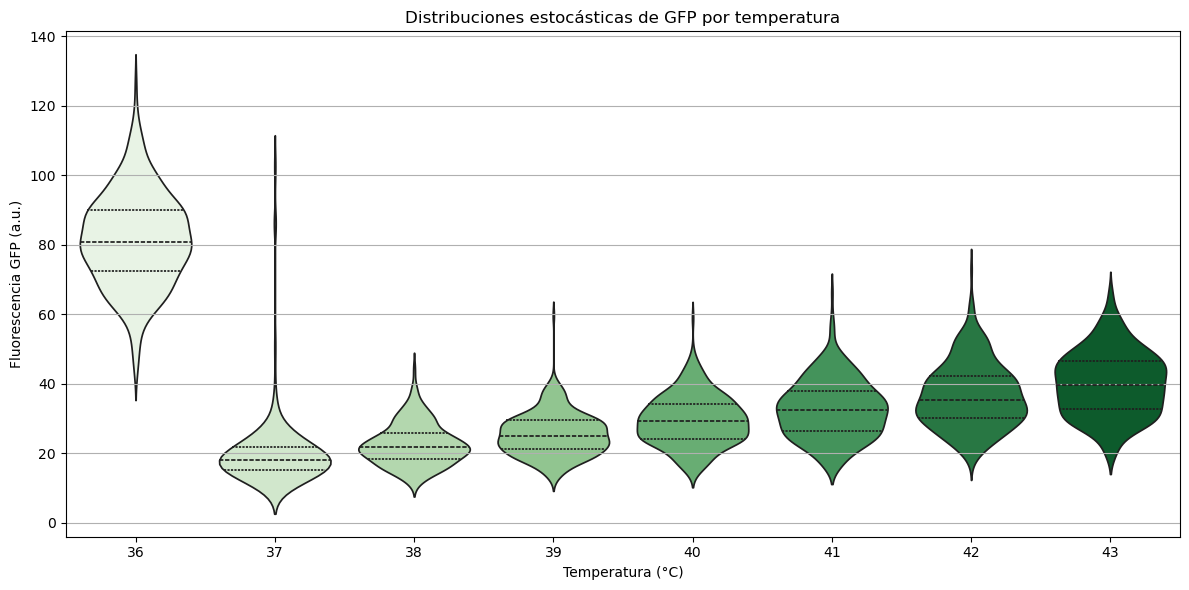

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------ Parámetros ------------------
alpha = 11
c1 = 0.05
c2 = 0.33
sigma1 = 2.0
sigma2 = 0.08
beta = 100
eta = 0.01
gamma_g = 10
m = 60
v = 1.5
b0 = 4

def gamma_from_temp(T):
    return 500 * np.exp(0.55 * (T - 32))

def d0(x):
    return m / (1 + c2*x**2/v**2 + sigma1*c2**2*x**4/v**4 + sigma1*sigma2*c2**3*x**6/v**6)

def f(x):
    num = m * (1 + c2*x**2/v**2 + alpha*sigma1*c2**2*x**4/v**4)
    den = 1 + c2*x**2/v**2 + sigma1*c2**2*x**4/v**4 + sigma1*sigma2*c2**3*x**6/v**6
    return num / den

def h(x):
    return 1 + 4*c1*x/v + 4*c2*x*d0(x)/v**2 + 16*sigma1*c2**2*x**3*d0(x)/v**4 + 36*sigma1*sigma2*c2**3*x**5*d0(x)/v**6

# ---------- Simulación de una célula ------------
def simulate_cell(gamma_x, dt=0.01, T_max=50):
    N = int(T_max / dt)
    x, g = 1.0, 1.0
    for _ in range(N):
        fx = f(x)
        hx = h(x)
        dxdt = (beta * fx - gamma_x * x) / hx
        noise_x = np.sqrt((beta * fx + gamma_x * x) / hx) * np.random.normal(0, np.sqrt(dt))
        dgdt = eta * beta * fx - gamma_g * g
        noise_g = np.sqrt(eta * beta * fx + gamma_g * g) * np.random.normal(0, np.sqrt(dt))
        x = max(x + dxdt * dt + noise_x, 0)
        g = max(g + dgdt * dt + noise_g, 0)
    return g

# ---------- Configuración del experimento ----------
temps = [36, 37, 38, 39, 40, 41, 42, 43]
cells_per_temp = 300

all_data = []

print("Simulando distribuciones estocásticas...")

for T in temps:
    gamma_x = gamma_from_temp(T)
    gfp_values = [simulate_cell(gamma_x) for _ in range(cells_per_temp)]
    c_gamma = 2 + 3 * ((T - 36) / (43 - 36))  # c(γx) de 2 a 5.7 aprox.
    fluorescence = [c_gamma * (g + b0) for g in gfp_values]
    for F in fluorescence:
        all_data.append({'temperatura': T, 'fluorescencia': F})

# Convertir a DataFrame para uso con seaborn
import pandas as pd
df = pd.DataFrame(all_data)

# --------- Gráfico tipo "violín" o "distribución" ----------
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='temperatura', y='fluorescencia', scale='width', inner='quartile', palette="Greens")
plt.title("Distribuciones estocásticas de GFP por temperatura")
plt.ylabel("Fluorescencia GFP (a.u.)")
plt.xlabel("Temperatura (°C)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
